# Telecom Customer Churn Prediction

### Data Source: kaggle

### INTRODUCTION
    
    In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. For many incumbent operators, retaining high profitable customers is the number one business goal. 
    
    In this project, you will analyze customer data for Telecom industry to predict churn customer based on demographic, usage and account based information. Main objective here is to analyze churn customers’ behavior and develop strategies to increase customer retention. Assumption — Here, data source has not provided any information related to time; So I have assumed that all the records are specific to the particular month.
    
    Dataset has information related to,
    
    1. Demographic:
        Gender - Male / Female
        Age range - In terms of Partner, Dependent and Senior Citizen
    
    2. Services:
        Phone service - If customer has Phone service, then services related to Phone like;
            Multiline Phone service
        Internet Service - If customer has Internet service, then services related to Internet like;
            Online security
            Online backup
            Device protection
            Tech support
            Streaming TV
            Streaming Movies
    
    3. Account type:
        Tenure - How long customer is with the company?
        Contract type - What kind of contract they have with a company? Like
            Monthly bases
            On going bases - If on going bases, then One month contract or Two year contract
        Paperless billing - Customer is paperless billion option or not?
        Payment method - What kind of payment method customer has?
            Mailed check
            Electronic check
            Credit card (Automatic)
            Bank transfer (Automatic)
    
    4. Usage:
        Monthly charges
        Total charges
    
    5. Target:
        Churn - Whether customer left the company or still with the company?
    
### Problem Description
    
#### Why customers leaving the company?
    The reasons behind the customer leaving company could be
    
        High charges
        Better offer from competitor
        Poor customer service
        Some unknown reasons
    
#### How to detect the churn customer?

        Monitoring usage
        Analysing complains
        Analyzing competitors offers
    
#### How to prevent customers from leaving a company?

    Once you detect high risk customers, apply
    
        Retention plans
        Improve customer service

## Importing Libraries

In [1]:
# Data Structures
import pandas as pd
import numpy as np

#Plotting
import seaborn as sns
import matplotlib.pyplot as plt

#sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Others
import warnings
warnings.filterwarnings("ignore")

## Loading The Dataset

In [2]:
df =pd.read_csv(r"C:\Users\Henry Oguns\Desktop\Data Science Portfolio\datasets\WA_Fn-UseC_-Telco-Customer-Churn.csv")
pd.set_option("display.max_columns", None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

Dataset has 7043 observations and 21 features

In [4]:
# Checking the variable types in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.duplicated().sum()

0

The dataset contanins 0 Null Values and Duplicates

In [7]:
# Understandin the overall statistic of the dataset

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
# Dropping columns does not contribute to the analysis

df =  df.drop(['customerID','TotalCharges', 'PaperlessBilling'], axis = 1)

## Exploratory Data Analysis

In [9]:
# Distribution of Churn in the dataset

df1 = (df.Churn.value_counts()*100)/7043
df1

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

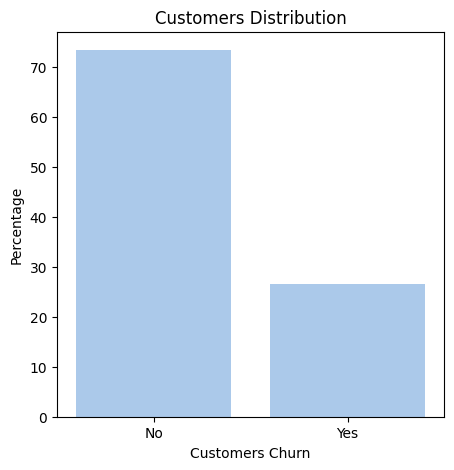

In [10]:
plt.figure(figsize = (5,5))
with sns.color_palette("pastel"):
    sns.barplot(df1)
plt.title("Customers Distribution")
plt.xlabel("Customers Churn")
plt.ylabel("Percentage")
plt.show()

Churn rate of telecom company is around 26%, Meaning around 26% of the subscribers left the company during given interval.

### Distribution of Features as Per Churn

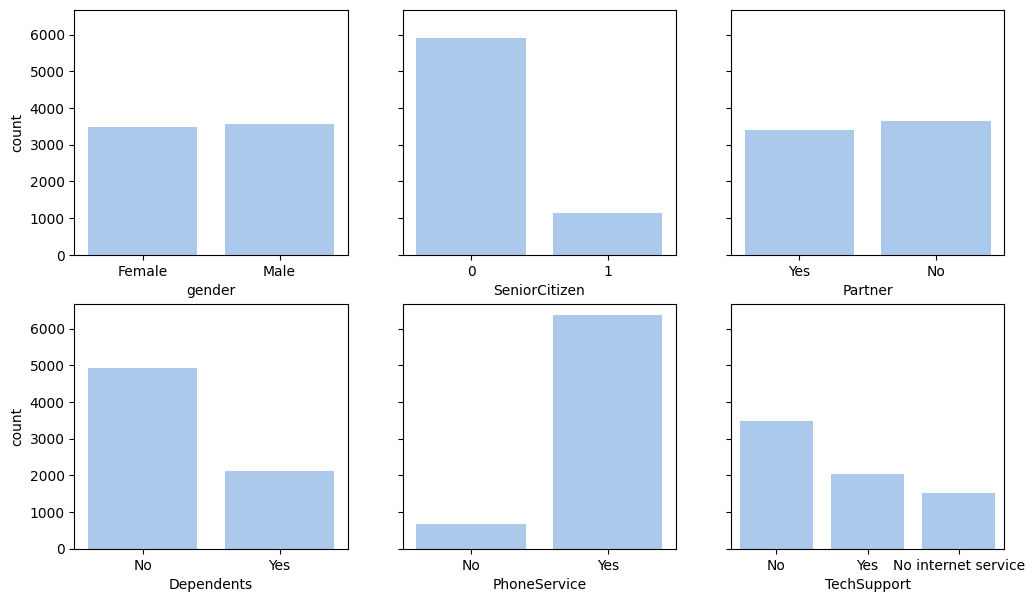

In [11]:
with sns.color_palette("pastel"):
    fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
    sns.countplot(x =  "gender", data=df, ax=axes[0,0])
    sns.countplot(x = "SeniorCitizen", data=df, ax=axes[0,1])
    sns.countplot(x = "Partner", data=df, ax=axes[0,2])
    sns.countplot(x = "Dependents", data=df, ax=axes[1,0])
    sns.countplot(x = "PhoneService", data=df, ax=axes[1,1])
    sns.countplot(x = "TechSupport", data=df, ax=axes[1,2])

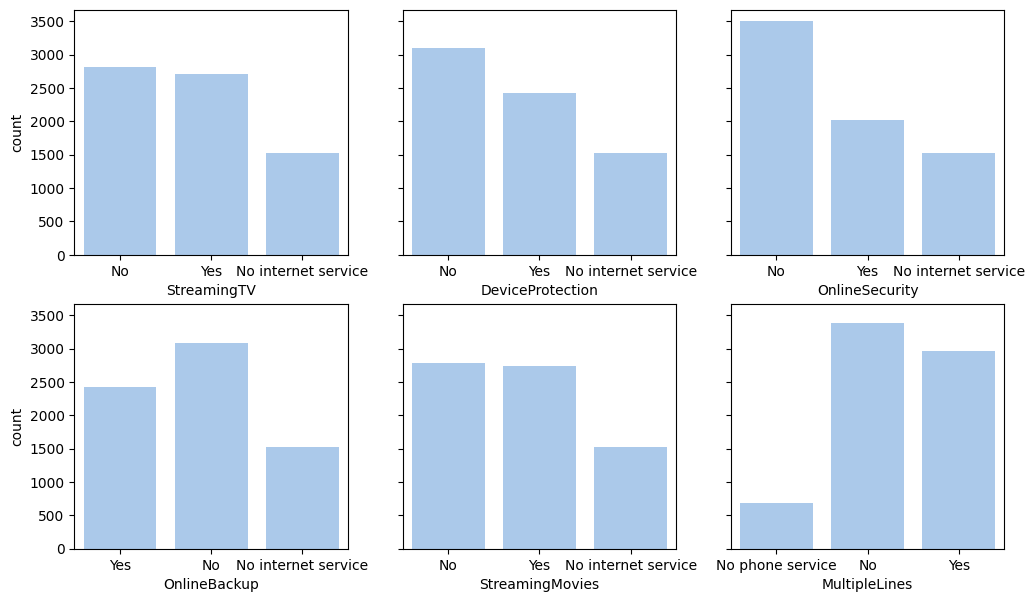

In [12]:
with sns.color_palette("pastel"):
    fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
    sns.countplot(x = "StreamingTV", data=df, ax=axes[0,0])
    sns.countplot(x = "DeviceProtection", data=df, ax=axes[0,1])
    sns.countplot(x= "OnlineSecurity", data=df, ax=axes[0,2])
    sns.countplot(x= "OnlineBackup", data=df, ax=axes[1,0])
    sns.countplot(x= "StreamingMovies", data=df, ax=axes[1,1])
    sns.countplot(x= "MultipleLines", data=df, ax=axes[1,2])

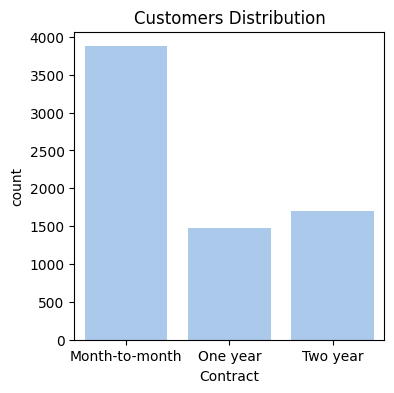

In [13]:
with sns.color_palette("pastel"):
    plt.figure(figsize=(4,4))
    sns.countplot(x = "Contract", data=df)
    plt.title("Customers Distribution")

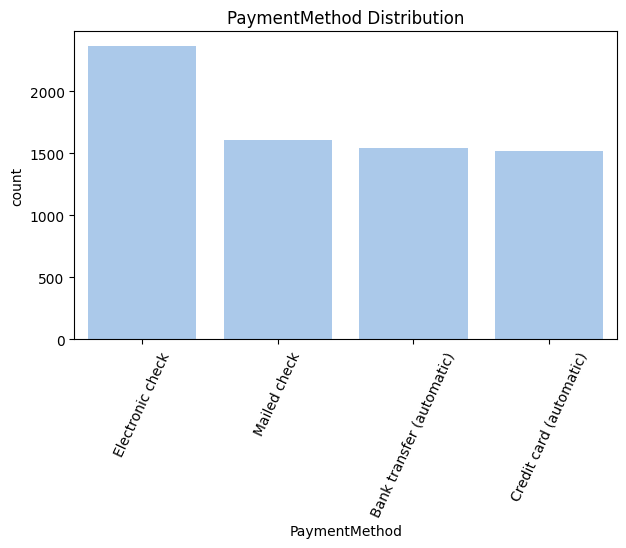

In [14]:
with sns.color_palette("pastel"):
    plt.figure(figsize=(7,4))
    sns.countplot(x = "PaymentMethod", data=df)
    plt.xticks(rotation = 65)
    plt.title("PaymentMethod Distribution")

## Feature Engineering

In [15]:
cate_val = []
cont_val = []

for column in df.columns:
    if df[column].nunique()<=10:
        cate_val.append(column)
    else:
        cont_val.append(column)
cate_val

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod',
 'Churn']

In [16]:
le = LabelEncoder()
df['gender'] =le.fit_transform(df['gender'])
df['Dependents'] =le.fit_transform(df['Dependents'])
df['PhoneService'] =le.fit_transform(df['PhoneService'])
df['MultipleLines'] =le.fit_transform(df['MultipleLines'])
df['InternetService'] =le.fit_transform(df['InternetService'])
df['OnlineSecurity'] =le.fit_transform(df['OnlineSecurity'])
df['DeviceProtection'] =le.fit_transform(df['DeviceProtection'])
df['OnlineBackup'] =le.fit_transform(df['OnlineBackup'])
df['TechSupport'] =le.fit_transform(df['TechSupport'])
df['StreamingTV'] =le.fit_transform(df['StreamingTV'])
df['StreamingMovies'] =le.fit_transform(df['StreamingMovies'])
df['Contract'] =le.fit_transform(df['Contract'])
df['PaymentMethod'] =le.fit_transform(df['PaymentMethod'])
df['Partner'] =le.fit_transform(df['Partner'])
df['Churn'] =le.fit_transform(df['Churn'])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,2,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,3,56.95,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,3,53.85,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,42.30,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,2,70.70,1


<Axes: >

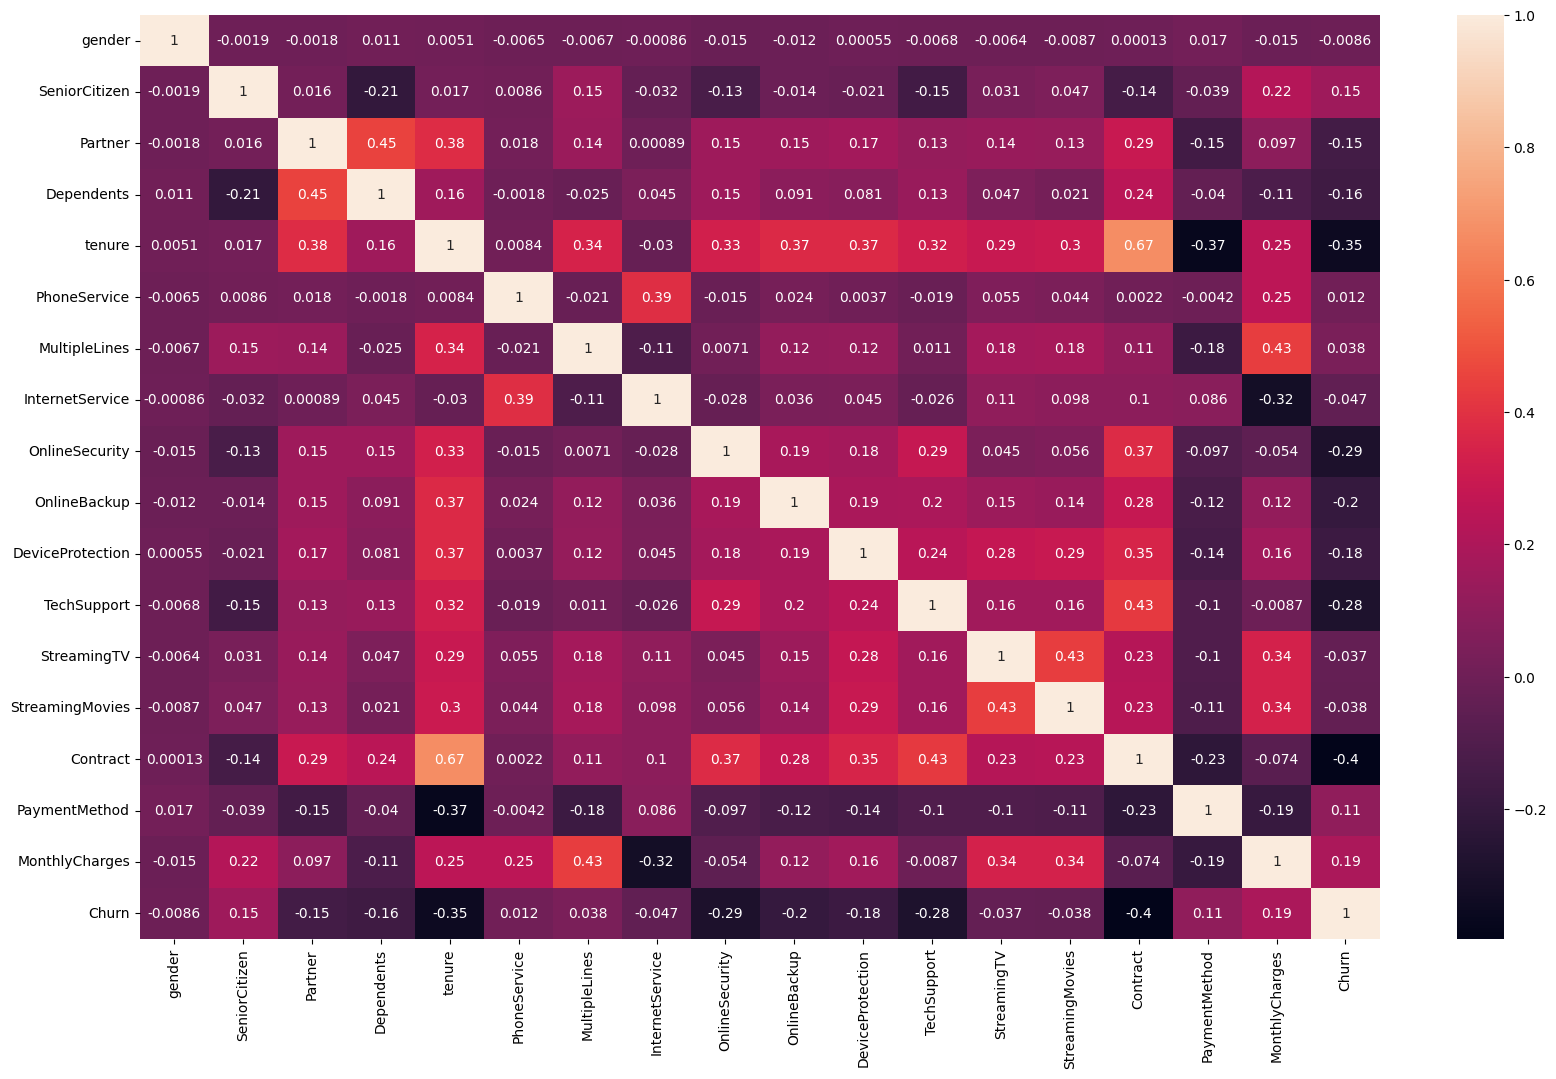

In [17]:
plt.figure(figsize = (20,12))
sns.heatmap(df.corr(), annot = True)

## Handling Imbalance Data 

In [18]:
# Distribution of Churn in the dataset

df1 = (df.Churn.value_counts()*100)/7043
df1

Churn
0    73.463013
1    26.536987
Name: count, dtype: float64

From above the above churn distribution, it show that there is an in our imbalance in the dataset

In [19]:
X = df.drop('Churn', axis = 1)
y = df['Churn']

In [20]:
X_res, y_res = SMOTE().fit_resample(X,y)

In [21]:
# After upsampling distribution in the dataset

y_res.value_counts()

Churn
0    5174
1    5174
Name: count, dtype: int64

## Feature Scaling

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size = 0.2, random_state = 40)

In [23]:
st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.fit_transform(X_test)

In [24]:
X_train

array([[-0.8904713 , -0.40994412, -0.78636971, ..., -0.64537626,
        -0.57655236,  1.22194934],
       [-0.8904713 , -0.40994412, -0.78636971, ..., -0.64537626,
         1.41872375, -1.67655972],
       [-0.8904713 ,  2.43935684, -0.78636971, ..., -0.64537626,
         0.42108569, -1.48560603],
       ...,
       [-0.8904713 , -0.40994412,  1.27166648, ...,  1.97153518,
        -0.57655236, -1.66441028],
       [ 1.12300082, -0.40994412,  1.27166648, ...,  1.97153518,
        -1.57419042,  0.25867238],
       [-0.8904713 ,  2.43935684,  1.27166648, ..., -0.64537626,
         1.41872375,  0.09571308]])

## Model Development

Here, I have used Logistic regression, Support Vector Machine, Random forest and Gradient boosting models to predict churn customers and compared which model works better for our dataset.

### Logistic Regression

In [25]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
y_pred1 = lg.predict(X_test)
accuracy_score(y_test, y_pred1)

0.7990338164251207

In [26]:
precision_score(y_test, y_pred1), recall_score(y_test, y_pred1), f1_score(y_test, y_pred1)

(0.7864768683274022, 0.8339622641509434, 0.8095238095238095)

### Support Vector Classifier

In [27]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred2 = svm.predict(X_test)
accuracy_score(y_test, y_pred2)

0.8207729468599034

In [28]:
precision_score(y_test, y_pred2), recall_score(y_test, y_pred2), f1_score(y_test, y_pred2)

(0.8169273229070837, 0.8377358490566038, 0.8272007452258966)

### Random Forest Classifier

In [29]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred3 = rfc.predict(X_test)
accuracy_score(y_test, y_pred3)

0.8405797101449275

In [30]:
precision_score(y_test, y_pred3), recall_score(y_test, y_pred3), f1_score(y_test, y_pred3)

(0.8529980657640233, 0.8320754716981132, 0.8424068767908309)

### Gradient Boosting Classifier

In [31]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred4 = gb.predict(X_test)
accuracy_score(y_test, y_pred4)

0.8251207729468599

In [32]:
precision_score(y_test, y_pred4), recall_score(y_test, y_pred4), f1_score(y_test, y_pred4)

(0.8273921200750469, 0.8320754716981132, 0.8297271872060207)

From the above Random Forest and Gradient Boosting Classifiers to be the best model for the data set. So lets perform a hypter-parameter turning on both of the models 

## HYPTERPARAMETER TUNNING

In [33]:
model_params = {
    'random_forest': {
        'model':RandomForestClassifier(oob_score=False),
        'params' : {
            'n_estimators':[1,5,50, 80, 100],
        }
    },
     'GradientBoostingClassifier': {
        'model':GradientBoostingClassifier(),
        'params' : {
            'learning_rate': [0, 1], 'n_estimators': [10,100,10], 'subsample' : [1, 2, 3]
        }
    }
}

In [34]:
scores=[]

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv = 5, return_train_score = False)
    clf.fit(X_train, y_train)
    scores.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })

In [35]:
df1 = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df1

,model,best_score,best_params
0,random_forest,0.835948,{'n_estimators': 50}
1,GradientBoostingClassifier,0.816742,"{'learning_rate': 1, 'n_estimators': 100, 'sub..."


## Random Forest Classifier

In [39]:
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)
y_pred5 = rfc.predict(X_test)
accuracy_score(y_test, y_pred5)

0.8434782608695652

## Gradient Boosting Classifier

In [37]:
gb = GradientBoostingClassifier(learning_rate = 1, n_estimators= 100)
gb.fit(X_train, y_train)
y_pred6 = gb.predict(X_test)
accuracy_score(y_test, y_pred6)

0.8111111111111111

After hypter parameter tunning Random Forest Classifier still remain the best classifer model for our dataset with accuracy score of 84.3%.

## Saving Model

In [40]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [41]:
import pickle

In [42]:
with open("Telcom_churn_prediction.pki", "wb") as f:
    pickle.dump(rfc,f)

## Conclusion

Based on model comparison and evaluation process, handling imbalance of the dataset helps give better working process during training and prediction process. 

In this notebook, I have tried to divide customer churn prediction problem into steps like exploration, model selection, development & comparsion.  

Based on this analysis, we can help retention team to analyze churn customers before they leave the company and reducing customer churn to the avegerage of 5-10% annually.